<a href="https://colab.research.google.com/github/anubhavgupta1/Dive-Into-Deep-Learning/blob/main/Deep%20Convolutional%20Neural%20Networks/VGG/mxnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  VGG

In [ ]:
!pip install d2l==0.16.1
!pip install -U mxnet-cu101==1.7.0

In [2]:
from d2l import mxnet as d2l
from mxnet import np, npx
from mxnet.gluon import nn
npx.set_np()

### Reading Data

In [3]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

### Model

In [4]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [5]:
def vgg_block(num_convs, num_channels):
    blk = nn.Sequential()
    for _ in range(num_convs):
        blk.add(nn.Conv2D(num_channels, kernel_size=3,padding=1, activation='relu'))
    blk.add(nn.MaxPool2D(pool_size=2, strides=2))
    return blk

In [6]:
conv_arch[0][1]

64

In [7]:
print(vgg_block(conv_arch[0][0],conv_arch[0][1]))

Sequential(
  (0): Conv2D(-1 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), Activation(relu))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
)


In [8]:
def vgg(conv_arch):
    net = nn.Sequential()
    # The convolutional part
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    # The fully-connected part
    net.add(nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(10))
    return net

In [9]:
X = np.random.uniform(size=(1, 1, 224, 224))

In [10]:
net = vgg(conv_arch)

In [11]:
net.initialize()
for blk in net:
    X = blk(X)
    print(blk.name, 'output shape:\t', X.shape)

sequential2 output shape:	 (1, 64, 112, 112)
sequential3 output shape:	 (1, 128, 56, 56)
sequential4 output shape:	 (1, 256, 28, 28)
sequential5 output shape:	 (1, 512, 14, 14)
sequential6 output shape:	 (1, 512, 7, 7)
dense0 output shape:	 (1, 4096)
dropout0 output shape:	 (1, 4096)
dense1 output shape:	 (1, 4096)
dropout1 output shape:	 (1, 4096)
dense2 output shape:	 (1, 10)


### Training

In [12]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

In [13]:
X = np.random.uniform(size=(1, 1, 224, 224))

In [14]:
net.initialize()
for blk in net:
    X = blk(X)
    print(blk.name, 'output shape:\t', X.shape)

sequential8 output shape:	 (1, 16, 112, 112)
sequential9 output shape:	 (1, 32, 56, 56)
sequential10 output shape:	 (1, 64, 28, 28)
sequential11 output shape:	 (1, 128, 14, 14)
sequential12 output shape:	 (1, 128, 7, 7)
dense3 output shape:	 (1, 4096)
dropout2 output shape:	 (1, 4096)
dense4 output shape:	 (1, 4096)
dropout3 output shape:	 (1, 4096)
dense5 output shape:	 (1, 10)


loss 0.175, train acc 0.935, test acc 0.926
1009.7 examples/sec on gpu(0)


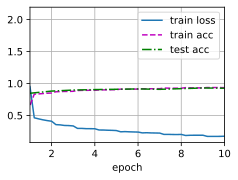

In [15]:
lr, num_epochs = 0.05, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)